<a href="https://colab.research.google.com/github/gravity102424/ESAA/blob/main/ESAA_YB_week02_2_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. 시본(Seaborn)
# 시각화를 위한 차트/그래프 유형

시각화는 통계 분석을 위한 시각화와 비지니스 분석을 위한 시각화로 나눌 수 있다.

비즈니스 분석을 위한 시각화는 청중의 유형과 수준 그리고 설득이 필요한 다양한 환경에 따라서 적절하게 여러 가지 차트를 활용하도록 발전되어 왔다.

통계 분석을 위한 시각화 역시 비지니스 분석을 위한 시각화와 유사하게 설득이 필요한 다양한 환경에 따라 적절한 차트를 활용한다.

# 정보의 종류에 따른 시각화 차트 유형

1. 히스토그램: 연속형 값에 대한 도수 분포를 나타낸다. X축 값은 도수 분포를 원하는 연속형 값의 구간, Y축 값은 해당 구간의 도수 분포(건수)를 나타낸다.

2. 바 플롯: 특정 칼럼의 이산 값에 따른 다른 칼럼의 연속형 값(평균, 총합등)을 막대 그래프 형태로 시각화한다. (수직 막대 그래프를 적용 시) X축 값은 특정 칼럼의 이산 값, Y축 값은 다른 칼럼의 연속형 값으로 나타낸다.

3. 박스 플롯: 연속형 값의 사분위 IQR와 최대, 최소, 이상치 값을 시각화한다. 보통 단일 칼럼의 연속형 값에 적용하지만, 이 연속형 값의 사분위를 다른 칼럼의 이산값별로 시각화할 때 사용할 수 있다.

4. 바이올린 플롯: 히스토그램의 연속 확률 분포 곡선과 박스 플롯을 바이올린 형태로 함께 시각화한다. 보통 단일 칼럼의 연속형 값에 적용하지만, 이 연속형 값의 분포를 다른 칼럼의 이산값별로 시각화할 때 유용하다.

5. 스캐터 플롯: 산점도로 불리며 2개의 연속형 값들을 X, Y 좌표상의 점으로 시각화하여 해당 값들이 어떻게 관계되어 있는지 나타낸다.

6. 상관 히트맵: 다수의 연속형 칼럼들에 대해서 상호 간의 상관 관계를 시각화한다.

시본은 X축과 Y축으로 구성된 이차원 축에서 데이터를 시각화해주므로 2개의 변수(칼럼)에 대한 정보를 기본적으로 표출해준다. 시본의 대부분 시각화 함수들은 hue라는 인자를 통해서 또는 플롯의 유형에 따라 연속형 데이터의 정보를 다른 이산형 데이터 값으로 세분화된 정보로 표현할 수 있게 만들어줘서 2개의 변수가 아닌 3개의 변수도 함께 정보로 시각화할 수 있다.

예들 들어 아래 그림의 왼쪽은 타이타닉 데이터 세트에서 Pclass(선실 등급)에 따른 평균 Age(나이)를 바 플롯으로 시각화한 결과이다. 이를 다시 Sex(성별)로 세분화된 결과로 표현하기 위해서 hue='sex'를 적용하면 오른쪽 그림과 같이 Pclass를 Sex의 male과 female별로 세분화한 평균 나이를 막대 그래프 형태로 나타낼 수 있다.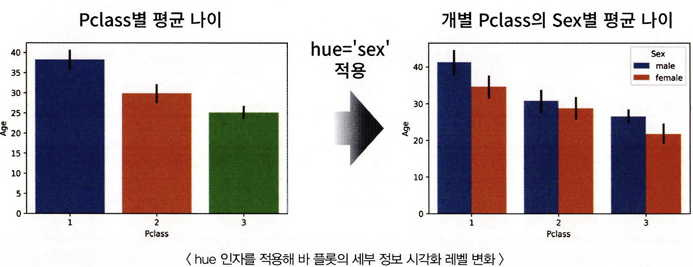

# 히스토그램(Histogram)

히스토그램은 데이터의 통계적인 분석을 위해 매우 많이 활용된다. 특히 머신러닝 학습 데이터의 중요 피처들 값이 어떠한 분포도를 가지고 있는지 확인하는 것은 모델 성능을 위해 중요하다. 히스토그램은 시본뿐만 아니라 맷플롯립, 판다스에서도 제공된다.

히스토그램은 연속형 값을 범위나 구간으로 그룹화해 개별 구간에 해당되는 데이터 건수를 시각화해준다. 시본 히스토그램은 histplot() 또는 displot() 함수를 사용한다. histplot()은 Axes 레벨 함수이며, displot()은 Figure 레벨 함수이다.

시본을 이용해 시각화할 데이터 세트는 타이타닉 데이터 세트이다.

In [4]:
import pandas as pd

titanic_df=pd.read_csv('/content/titanic_train.csv')
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


먼저 시본의 histplot() 함수를 이용해 타이타닉 승객의 나이를 히스토그램으로 시각화해보자. histplot() 함수의 인자로 히스토그램 대상이 되는 Age 칼럼 데이터를 가지는 titanic_df['Age']를 입력하고, 구간의 개수는 bins=20으로 설정한다. 시본의 Axes 레벨 함수를 사용할 경우에는 전체 Figure의 크기를 조절하기 위해서는 맷플롯립과 마찬가지로 plt.figure(figsize=(6,3))과 같이 적용해야 한다.

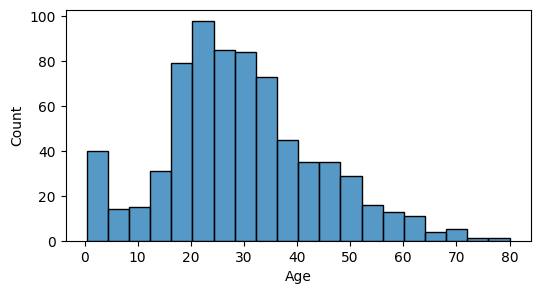

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시본에서도 plt.figure()의 figsize 인자를 입력하여 전체 Figure의 크기 조절
plt.figure(figsize=(6,3))

# DataFrame의 칼럼명을 자동으로 인식해서 xlabel 값을 할당. ylabel 값은 Count로 설정.
sns.histplot(titanic_df['Age'],bins=20)
plt.show()

시본의 많은 시각화 함수들은 판다스 DataFrame과 잘 통합되어 있다. 이들 시각화 함수들은 X축과 Y축 각각에 DataFrame을 칼럼명을 입력받아서 처리할 수 있도록 설계되어 있다. 이를 위해 대부분의 시각화 함수들은 data,x,y를 각각 인자로 가지는데, data 인자는 시각화 대상 DataFrame 객체, x 인자는 X축에 사용될 칼럼명, y 인자는 Y축에 사용될 칼럼명을 입력받는다.

히스토그램은 기본적으로 한 개의 변수만 시각화하므로 y 인자는 생략하고, x 인자는 'Age', data 인자는 타이타닉 DataFrame 객체변수인 titanic_df를 입력하자. 이번엔 bins=30으로 구간 개수를 늘리고, kde=True로 설정해 히스토그램의 연속 확률분포 곡선까지 함께 시각화해보자.

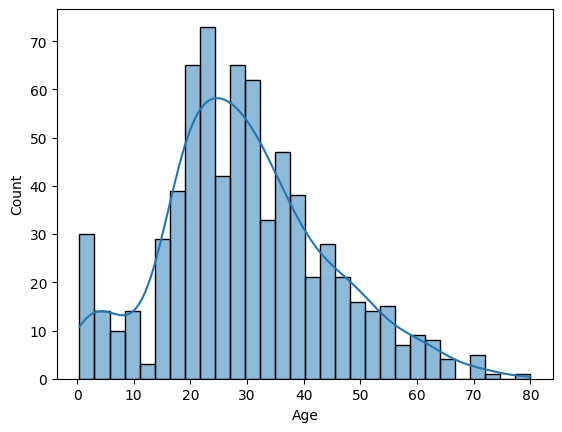

In [3]:
sns.histplot(x='Age',data=titanic_df,bins=30, kde=True)
plt.show()

displot() 함수는 Figure 레벨 함수이다. Figure 레벨 함수의 특징은 맷플롯립 API 사용을 최소화하고, 기본 맷플롯립에서 사용하는 기능들을 Figure 레벨 함수의 인자 등으로 대체하게 설계되었다. 예를 들어, Figure 레벨 함수를 사용 시 Figure의 크기는 더 이상 plt.figure()로 조절할 수 없으며 해당 함수에서 인자로 Figure의 크기를 조절해야 한다.

displot() 함수를 이용해서 Age 칼럼값의 히스토그램을 시각화해보자. displot() 함수를 호출 전에 plt.figure(figsize=(8,4))를 이용해 Figure를 생성하도록 시도한다. x 인자, data 인자, kde 인자는 모두 이전과 동일하다.

<Figure size 800x400 with 0 Axes>

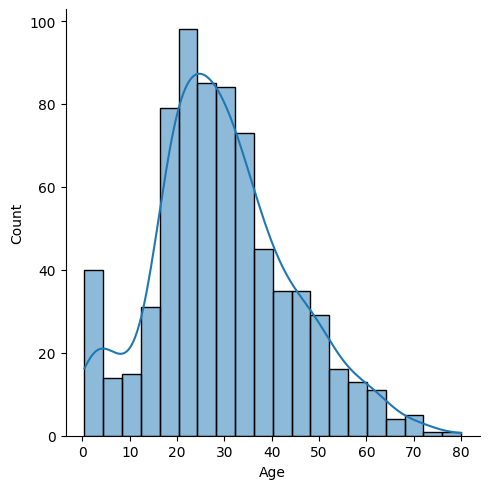

In [6]:
import seaborn as sns

# seaborn의 figure레벨 그래프는 plt.figure()로 Figure 크기를 조절할 수 없다.
plt.figure(figsize=(8,4))
sns.displot(x='Age',data=titanic_df, kde=True)
plt.show()

plt.figure(figsize=(8,4))를 이용해 가로의 길이를 8, 세로의 길이를 4로 설정함으로써 가로가 세로의 2배 크기가 되도록 Figure를 설정했지만, 오히려 세로가 더 긴 히스토그램으로 만들어졌다. 이는 시본의 Figure 레벨 함수를 사용하면 plt.figure()를 이용하여 Figure의 크기를 조절할 수 없기 때문이다.

displot() 함수의 Figure의 크기를 조절하기 위한 인자로 height와 aspect가 주어지는데, height는 세로(높이)의 크기를 의미하며 aspect는 가로와 세로의 배율을 의미한다. width와 같은 별도의 가로(너비) 크기를 설정하는 인자는 제공되지 않고, height*aspect를 적용하여 자동으로 가로의 크기가 결정된다. 예를 들어 height가 4이고 aspect가 2인 경우, 가로 크기는 4*2=8로 주어진다. height와 aspect 값을 입력하여 displot()으로 다시 히스토그램을 시각해보자.

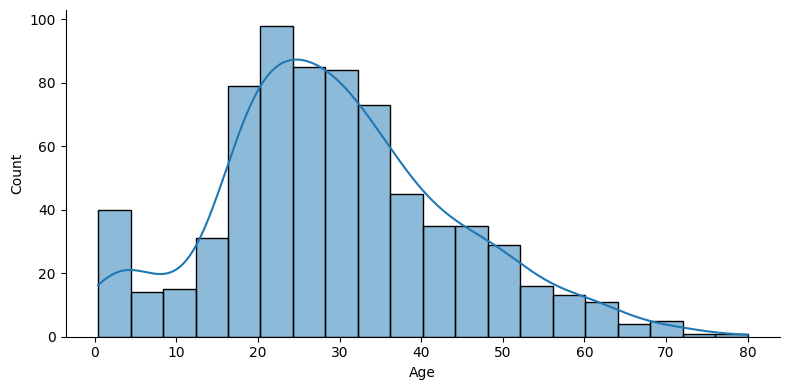

In [5]:
import seaborn as sns

sns.displot(titanic_df['Age'],kde=True, height=4, aspect=2)
plt.show()

# 카운트 플롯

히스토그램이 연속형 값에 대해서 구간에 따른 건수를 시각화한다면 카운트플롯은 이산형 값의 건수를 막대 그래프 형태로 시각화한다. 주로 카테고리성 칼럼 값별 건수를 시각화하는 데 사용된다. 카운트플롯은 시본의 countplot()을 사용한다. 아래는 타이타닉 데이터의 Pclass(선실 등급) 값별 건수를 시각화한다.

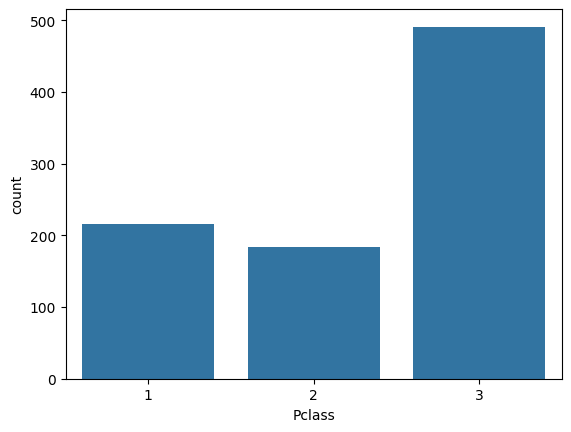

In [6]:
sns.countplot(x='Pclass',data=titanic_df)
plt.show()

# 바 플롯(barplot)

바 플롯(barplot)은 이름 그대로 막대 그래프 형태의 플롯이다. 간단한 시각화이지만, 2차원 축 기반의 시각화에 널리 활용된다. 바 플롯(수직 막대 그래프로 가정하면) X축 값이 이산형 값으로 값의 종류가 너무 많지 않을 때 유용하게 사용될 수 있다. 보통 Y축 값은 Y축에 해당하는 칼럼값의 평균이나 총합으로 표현되는 연속형 값을 가진다. 물론 바 플롯을 수직 막대 그래프가 아닌 수평 막대 그래프로 그리면 X축과 Y축이 바뀌게 되므로 Y축이 이산형 값, X축이 연속형 값을 가지게 설정해야 한다.

그럼, 시본을 이용하여 타이타닉 데이터 세트의 Pclass 1,2,3 값별로 Age의 평균 값을 바 플롯으로 표현해 보자. 선실 등급별로 탑승한 승객의 평균 나이를 시각화한다. 바 플롯은 시본의 barplot() 함수로 간단하게 구현할 수 있다. barplot() 함수의 data 인자로 타이타닉 DataFrame 객체명을, x 인자로 X축 값에 해당하는 칼럼명을, y 인자로 Y축 값에 해당하는 칼럼명을 입력하면 자동으로 바 플롯을 시각화해준다.

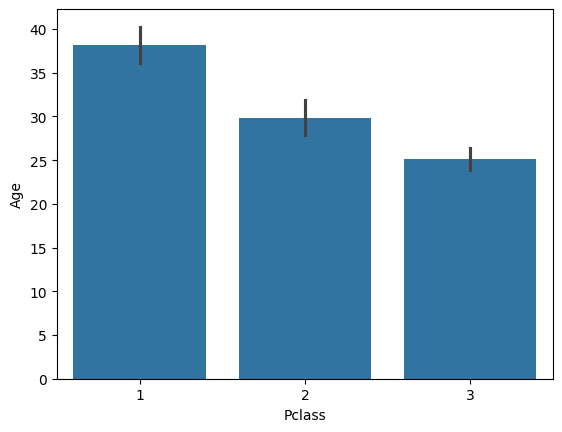

In [7]:
# 자동으로 xlabel, ylabel을 barplot()의 x 인자값인 Pclass, y 인자값이 Age로 설정.
sns.barplot(x='Pclass',y='Age',data=titanic_df)
plt.show()

시본에서는 맷플롯립과 다르게 pyplot 모듈의 xlabel(), ylabel() 함수를 사용하지 않고도 X축명 Pclass와 Y축명 Age를 자동으로 설정한다. barplot() 함수는 기본적으로 Y축 값의 평균 값을 나타낸다. 평균 외에도 총합, 중앙값 등을 나타낼 수도 있는데, 이는 estimator 인자값을 설정하여 변경할 수 있다.

이번에는 X축 값을 Pclass로, Y축 값을 Survived로 설정하고 바 플롯을 그려 보자.

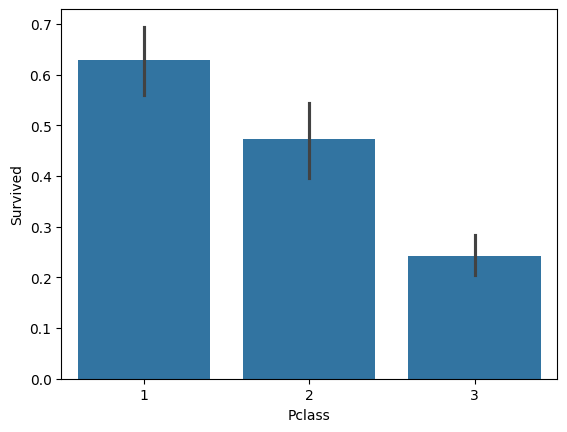

In [7]:
sns.barplot(x='Pclass',y='Survived',data=titanic_df)
plt.show()

Survived 칼럼 값은 0과 1 두 개의 값(0은 사망, 1은 생존)으로 구성되어 있다. 그런데 위 예제의 시각화 결과에서 Y축 값인 Survived를 보면 0~1 사이의 소수점을 가진 실수로 표현이 되어 있다. 이는 바 플롯이 Y값의 평균, 즉 Survived의 평균을 표현했기 때문이다. 예를 들어 10명의 승객 중 6명이 사망하고 4명이 생존했다면 10명 승객의 평균 Survived값은 0.4가 된다. 사망과 생존한 승객 모두의 Survived값은 6개의 0을 더하고 4개의 1을 더해서 4가 되며, 평균값을 구하기 위해서 승객 수 10으로 나누면 평균값은 0.4가 된다.

Survived값이 0과 1로 되어 있기 때문에 X축 값을 Pclass로, Y축 값을 Survived를 설정하면 선실 등급별 승객의 평균 생존율을 나타내게 된다. Y축 값을 평균/총합/중앙값 등의 연속형 값을 표현한다고 설명했는데, Survived 칼럼은 연속형 숫자값이 아니라 이산형 숫자값이다. 하지만 값이 0과 1로 되어 있기에 평균값을 평균 비율로 나타낼 수 있다.

barplot() 함수는 수직 또는 수평 막대 그래프를 시각화 선택을 orient 인자로 설정할 수 있다. orient가 v일 경우는 수직(Vertical) 막대 그래프를, h일 경우는 수평(Horizontal) 막대 그래프를 그린다. orient값을 별도로 설정하지 않으면 barplot() 함수는 입력된 X축 값과 Y축 값의 데이터 유형을 판단하여 자동으로 수직 또는 수평 막대 그래프를 그려주지만, X축과 Y축이 모두 숫자형 값이면 수직 막대 그래프를 우선으로 한다.

바 플롯은 수직 막대 그래프의 경우 일반적으로 X축 값을 이산형 값으로 설정하며 이산형 값은 숫자값 또는 문자열값 모두 가능하다. 하지만 수직 막대 그래프의 Y축 값을 문자열 값으로 설정해서는 안된다. 문자열 값의 평균, 총합은 정보로서 완전히 다른 의미이고, 시각적으로도 이해할 수 없기에 당연한 결과이다. barplot() 함수를 사용할 때 만약 Y축 값을 문자열 값으로 입력하고 X축 값을 숫자형 값으로 입력하면 barplot() 함수는 자동으로 수직 막대 그래프가 아닌 수평 막대 그래프로 시각화해준다. 수직 막대 그래프는 Y축 값이 문자열이 될 수 없기에 barplot() 함수는 X축 값이 숫자라면 이는 사용자가 수평 그래프를 의도하고 입력한 인자라고 판단하여 자동으로 그래프 유형을 반환해 준다.

아래 예제는 barplot() 함수가 x 인자로 숫자형 값인 Pclass를, y 인자로 문자열 값인 'Sex'를 입력받은 뒤 자동으로 이들 인자값의 데이터 유형을 파악하여 수평 막대 그래프로 전환해 준다.

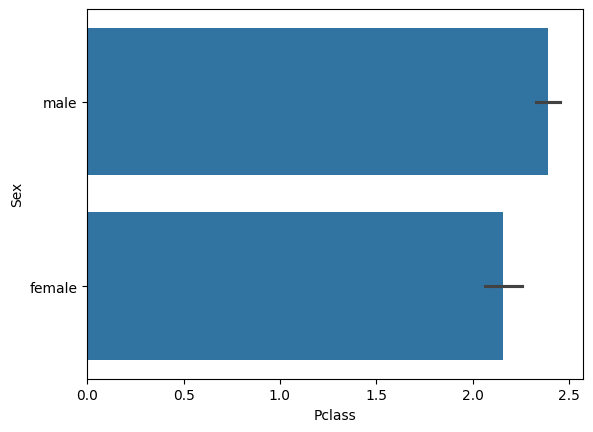

In [8]:
### y축을 문자값으로 설정하면 자동으로 수평 막대 그래프 변환
sns.barplot(x='Pclass',y='Sex',data=titanic_df)
plt.show()

수평 막대 그래프의 X축 값인 Pclass는 1,2,3밖에 없지만 시각화된 결과는 0~2.5 사이의 값으로 표시된 것에 주목해 보자. 바 플롯은 수평 막대 그래프의 경우 X축 값, 수직 막대 그래프의 경우 Y축 값이 연속형 값을 기대하게 된다. 때문에 수평 막대 그래프의 X축 값인 Pclass값이 평균값으로 만들어져서 표현된다.

위 예제와 같이 X축, Y축 모두 이산값을 입력한다면 바 플롯으로 표현되는 정보를 시각적으로 잘못 이해될 수가 있다. 때문에 바 플롯은 수직 막대 그래프의 경우 Y축 값을 연속형 값으로, 수평 막대 그래프는 X축 값을 연속형 값으로 설정해 줘야 시각적으로 정보가 의미하는 바를 명확하게 파악할 수 있따. 또한 바 플롯 생성 시 X축 값과 Y축 값을 모두 문자열 값으로 입력하면 바 플롯이 의미하는 정보의 표현 의도와 완전히 어긋나기 때문에 barplot() 함수는 오류를 발생시킨다.

아래는 barplot() 함수의 x 인자로 문자열인 Name을, y인자로 문자열인 Sex를 입력하기 때문에 오류를 발생시킨다.(x와 y 모두 숫자형이 아니라는 오류 메시지를 출력한다.)

<Axes: xlabel='Name', ylabel='Sex'>

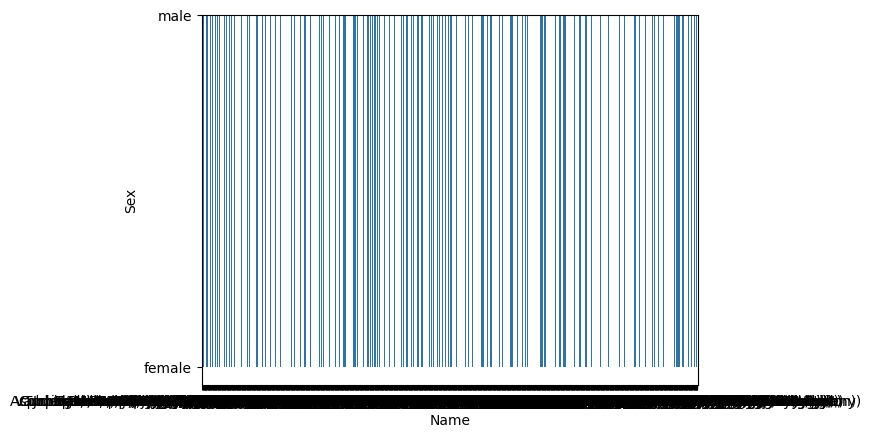

In [9]:
# x 인자로 문자열인 Name을, y 인자로 문자열인 Sex를 입력하므로 barplot은 오류를 발생.
sns.barplot(x='Name',y='Sex',data=titanic_df)

수직 막대 그래프의 Y축 표현값을 평균이 아니라 총합으로 나타낼 수도 있다. 이때 사용되는 인자가 estimator이다. estimator=sum으로 설정하면 평균이 아니라 총합으로 표현할 수 있다. 아래는 Pclass별로 Survived의 총합을 바 플롯으로 보여 주므로 선실 등급별 생존자 수를 나타낸다.

/tmp/ipython-input-3200990007.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass',y='Survived',data=titanic_df,ci=None,estimator=sum)


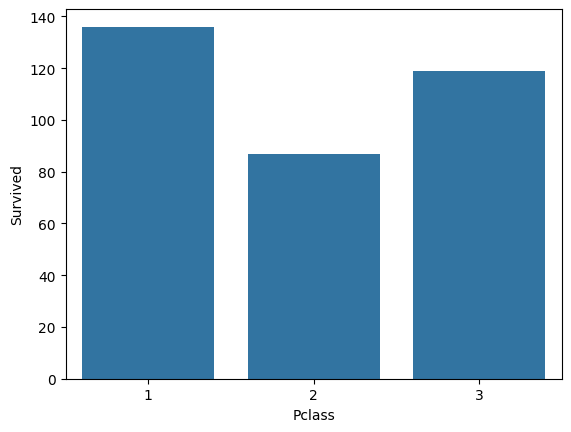

In [12]:
# estimator=sum을 적용하여 평균이 아니라 총합으로 표현.
sns.barplot(x='Pclass',y='Survived',data=titanic_df,ci=None,estimator=sum)
plt.show()

# barplot() 함수의 hue 인자를 사용하여 시각화 정보를 추가적으로 세분화하기

일반적으로 2개의 축을 기반으로 한 2차원 평면 형태의 시각화는 X축과 Y축에 따른 2개의 정보를 시각화해주지만, 세부적인 추가 정보를 더해서 시각화할 수도 있다. 특히 이러한 추가 정보는 좀 더 세분화된 비교 정보를 전달하는 데 매우 효과적이다. barplot() 함수는 hue 인자를 통해서 이러한 세부 정보를 추가적으로 전달할 수 있다.

아래는 Pclass를 X축 값, Age를 Y축 값으로 설정하되 추가적으로 barplot() 함수의 hue 인자를 Sex로 설정하여 X축 Pclass별로 세부적인 추가 정보인 성별(Sex) 값에 따른 평균 나이를 시각화하고 있다.

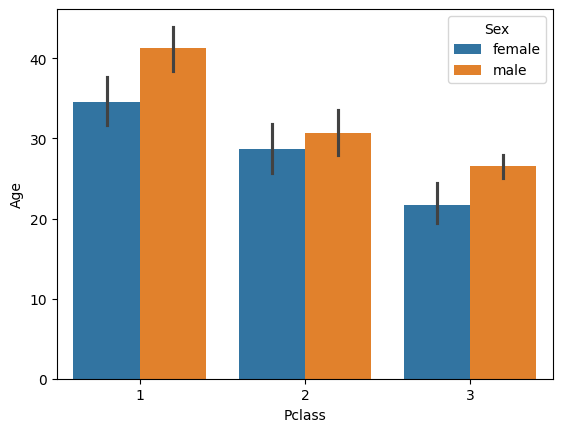

In [13]:
# 아래는 Pclass가 X축값이며 hue파라미터로 Sex를 설정
# 개별 Pclass 값별로 Sex에 따른 Age 평균 값을 구함.
sns.barplot(x='Pclass',y='Age',hue='Sex',data=titanic_df)
plt.show()

hue='Sex'가 적용되면서 X축의 Pclass값이 보다 세분화된 형태로 쪼개졌다. Pclass가 1, 2, 3일 때 모두 2개의 막대의 그래프로 나누어지는데 각각 Sex의 값이 male일 때 파란색 막대 그래프, female일 때 주황색 막대 그래프로 나눠졌다. 그리고 오른쪽 상단에는 범례로 Sex 칼럼의 개별 값들과 의미하는 색깔이 표시되어 있다. hue='Sex'를 적용하게 되면서 기존의 Pclass 값별로만 비교하여 보여주던 정보에 개별 Pclass값별로 Sex에 따른 세부적인 비교를 더하면서, 좀 더 분석의 차원을 높여주고 있다.

이번에는 Pclass별 생존율을 좀 더 세분화하여 Pclass에 따른 성별(Sex)별 생존율을 바 플롯으로 시각화해보자. barplot() 함수의 x 인자값으로 Pclass를 y, 인자값으로 Survived를, 그리고 hue 인자값으로 Sex를 설정한다.

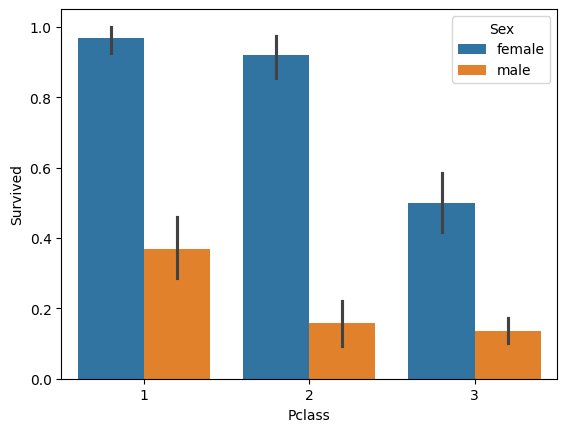

In [14]:
# 개별 Pclass 값별로 Sex에 따른 Survived 평균값을 구함.
# Pclass가 X축 값이며 Survived가 Y축 값. hue 파라미터로 Sex를 설정
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)
plt.show()

# 박스 플롯
박스 플롯은 상자 수염 그래프라고도 불린다. 그래프가 상자 형태로 생긴 몸통 부분과 위, 아래로 길게 이어진 수염 형태로 이뤄져 있기 때문이다. 시본은 박스 플롯 시각화를 위해서 boxplot() 함수를 제공한다. boxplot() 함수의 주요 인자로는 다른 시본의 시각화 함수와 마찬가지로 x,y,data가 있다. 박스 플롯은 분위수를 기반으로 하고 있는데, 분위수는 연속형 값에 적용해야 의미 있는 정보가 될 수 있다. 박스 플롯은 연속형 값에 대한 IQR분위와 최소/최대 그리고 이상치 정보를 시각화한다.

boxplot() 함수의 x 또는 y 인자로 연속형 값을 입력할 수 있는데, y에 입력 시 수직 박스 플롯을, x에 입력 시 수평 박스 플롯을 나타낸다. 아래는 boxplot() 함수의 y 인자에 Age 칼럼을 설정하여 Age 값의 분위수를 기반으로 한 수직 박스 플롯을 시각화해준다.

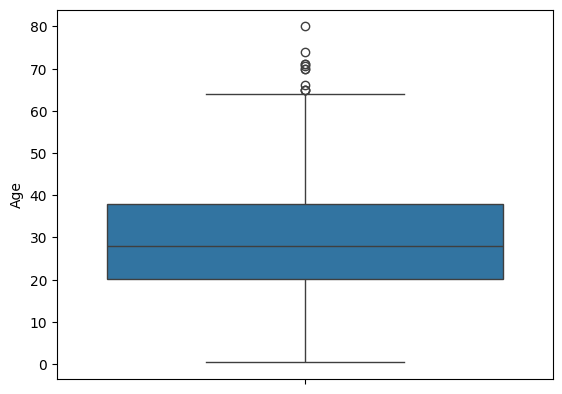

In [15]:
sns.boxplot(y='Age',data=titanic_df)
plt.show()

기본적으로 박스 플롯은 단일 칼럼에 대한 분위수를 기반으로 하고 있지만, 추가적인 세분화 레벨에서도 적용이 가능하다. 예를 들어 여러 개의 Pclass 값별로 Age에 대한 여러 개의 박스 플롯을 시각화하기를 원한다면 y 인자에 Age를, 그리고 x 인자에 Pclass를 입력하면 된다. 추가적인 세분화 레벨로 여러 개의 수직 박스 플롯을 표현하고자 한다면 반드시 x 인자는 이산형 값이 되어야 한다. x 인자에 연속형 값을 입력하면 너무 많은 박스 플롯들을 그리기 때문에 표현되는 정보가 큰 의미가 없어지게 된다.

아래는 boxplot() 함수의 y인자에 Age를, x 인자에 Pclass를 입력하여 Pclass값 1, 2, 3별로 Age에 대한 수직 박스 플롯을 그려 준다.

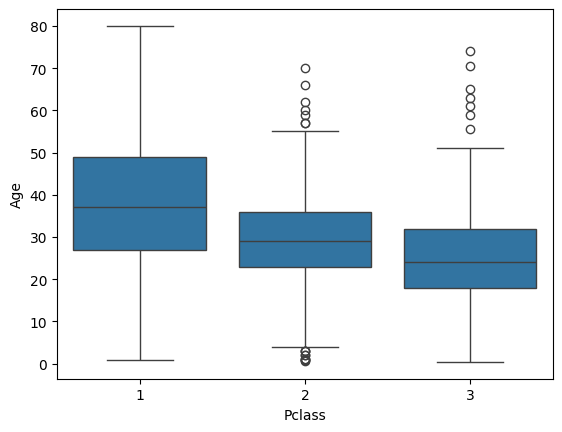

In [16]:
sns.boxplot(x='Pclass',y='Age',data=titanic_df)
plt.show()

여기에 hue를 적용하여 한 단계 더 추가적인 정보를 출력할 수 있다. hue 인자값으로 Sex 칼럼명을 입력하게 되면 Pclass값별로 세부적인 Sex값인 male과 female에 따른 Age값의 박스 플롯들을 시각화할 수 있다.

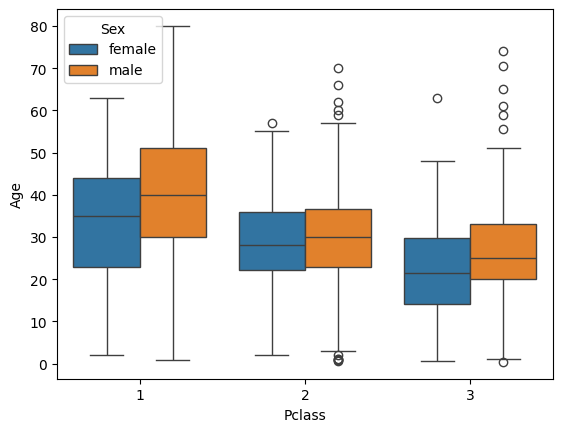

In [18]:
sns.boxplot(x='Pclass',y='Age',hue='Sex',data=titanic_df)
plt.show()

# 바이올린 플롯
바이올린 플롯은 히스토그램의 연속 확률 분포 곡선과 박스 플롯을 함께 시각화할 수 있다. 연속 확률 분포 곡선을 대칭적으로 그리고 가운데에 박스 플롯을 검은색 몸통과 수염으로 나타낸 모습이 흡사 바이올린과 유사하다고 해서 붙여진 명칭이다.

바이올린 플롯 역시 연속형 값에 적용해야 의미 있는 정보로 시각화될 수 있다. 시본은 바이올린 플롯을 위해 violinplot() 함수를 제공한다. violinplot() 함수는 boxplot() 함수와 동일하게 x 또는 y 인자로 연속형 값을 입력할 수 있는데, y에 입력 시 수직 바이올린 플롯을, x에 입력시 수평 바이올린 플롯을 나타낸다. violinplot() 함수에 y 인자값으로 Age를 data는 titanic_df를 이용하여 Age값을 수직 바이올린 플롯으로 시각화해보자.

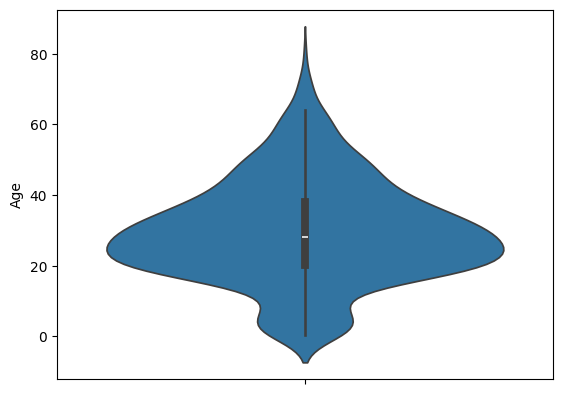

In [37]:
# Age 칼럼에 대한 수직 바이올린 플롯 시각화
sns.violinplot(y='Age',data=titanic_df)
plt.show()

히스토그램이나 박스 플롯이 별도로 존재하기 때문에 굳이 바이올린 플롯까지 활용할 필요가 없다고 느낄 수 있다. 하지만 앞에 소개한 boxplot() 함수와 유사하게 violinplot() 함수는 여러 이산 값별로 여러 개의 바이올린 플롯들을 그릴 수 있다. 이는 여러 이산값별로 여러 개의 히스토그램 연속 확률 분포 곡선들을 그려 줄 수 있는 장점을 가지고 있다.

시본의 violinplot() 함수를 이용하여 Pclass별로 Age의 바이올린 플롯을 그려 보겠다. Pclass별로 Age의 연속 확률분포 곡선과 박스 플롯을 함께 시각화하므로 Age값의 데이터 분포를 Pclass 값별로 비교할 수 있다.

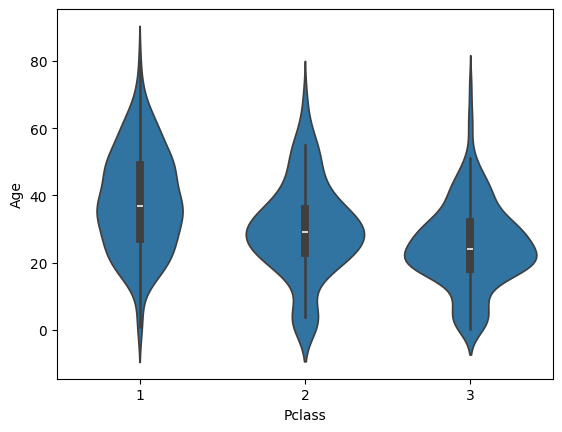

In [20]:
# x축값인 Pclass의 값별로 y축 값인 Age의 바이올린 플롯을 그림
#  pClass값별 Age 데이터 분포를 비교하여 볼 수 있음.
sns.violinplot(x='Pclass',y='Age',data=titanic_df)
plt.show()

1등실 승객의 나이는 30대 초반부터 40대 후반까지 비교적 넓은 범위에서 완만하게 집중되어 있지만, 2등실과 3등실 승객의 나이는 20대 중반부터 30대 초반까지의 상대적으로 좁은 범위에 집중되어 있음을 알 수 있다.

violinplot() 함수 역시 hue를 이용하여 한단계 더 추가적인 세부 정보를 제공할 수 있다. violinplot() 함수를 이용하여 개별 Pclass 내에서 Sex 값별로 Age의 바이올린 플롯을 시각화해보자. 앞의 예제에서 violinplot() 함수에 hue='Sex'를 추가해 주면 된다.

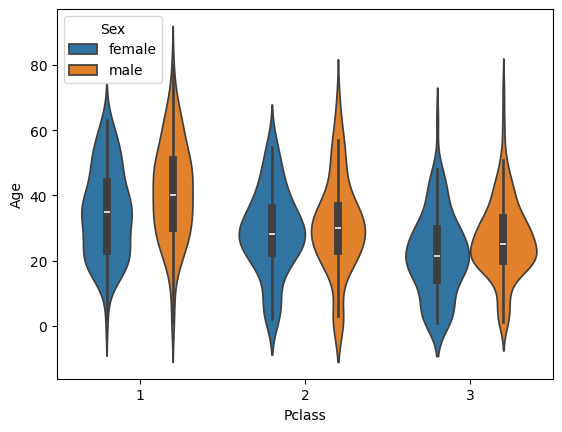

In [21]:
# x축값인 개별 Pclass 내에서 Sex값별로 y축 값인 Age의 바이올린 플롯을 그림
sns.violinplot(x='Pclass',y='Age',hue='Sex',data=titanic_df)
plt.show()

시본의 histplot() 함수는 hue 기능을 제공하지만 그보다는 violinplot() 함수가 특정 이산값에 해당하는 연속형 값의 데이터 분포도를 훨씬 더 효과적으로 시각화해주기 때문에 데이터 분석 시 활용도가 높다.

# subplots를 이용하여 시본의 다양한 그래프를 시각화
이번에는 앞에서 배운 시본의 다양한 그래프를 여러 개의 subplots 상에서 시각화해보도록 하겠다. 시본의 시각화 함수를 subplots로 할당된 개별 Axes 객체에 적용하는 방식은 맷플롯립과 약간 다르다.

시본의 모든 Axes레벨 시각화 함수는 ax라는 인자를 가지고 있다. 시각화 함수 호출 시 이 ax 인자에 개별 Axes 객체를 할당하면 된다. 예를 들어 fig,axs=plt.subplots(nrows=1,ncols=3)라고 한다면 sns.countplot(x=칼럼명, data=DataFrame, ax=axs[0])과 같이 ax 인자값으로 첫번째 로우 위치의 첫번째 칼럼 위치에 해당하는 Axes 객체 변수를 입력하게 되면 해당 위치의 subplot에 카운트 플롯을 시각화해준다.

이제 주요 이산형 칼럼인 Survived, Pclass, Sex의 건수를 시각화해보자. 3개 칼럼이므로 세 개의 Axes 객체를 가지는 subplots를 생성하고 개별 Axes 객체에 시본의 countplot 함수를 적용하자. countplot() 함수를 차례로 호출하되, ax 인자값에 왼쪽부터 생성되는 Axes 객체 변수를 순차적으로 입력하여 왼쪽 subplots부터 Survived, Pclass, Sex 순으로 시각화해보자.

index: 0
index: 1
index: 2


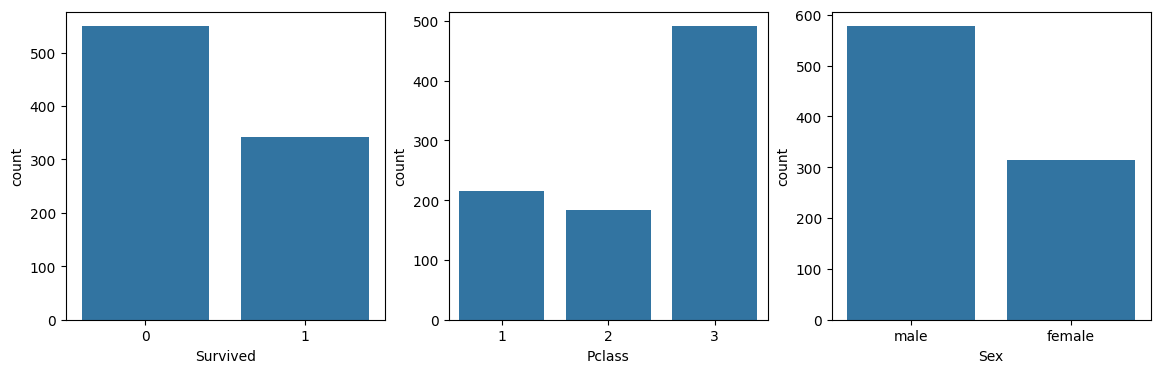

In [22]:
cat_columns = ['Survived','Pclass','Sex']

# nrows는 1이고 ncols는 칼럼의 개수만큼인 subplots을 설정.
fig, axs = plt.subplots(nrows=1, ncols=len(cat_columns),figsize=(14,4))

for index, column in enumerate(cat_columns):
  print('index:',index)
  # seaborn의 Axes 레벨 function들은 ax 인자로 subplots의 어느 Axes에 위치할지 설정.
  sns.countplot(x=column, data=titanic_df, ax=axs[index])

건수를 표현할 칼럼들을 리스트 형태로 [Survived, Pclass, Sex]와 같이 생성한 뒤 fig, axs = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(14, 4))를 호출하여 3개의 Axes를 생성하여 axs 객체 변수에 할당한다.  axs[이, axs[l], axs[2] 각각은 왼쪽부터 생성되는 Axes 객체를 할
당받게 되므로 루프를 돌면서 개별 칼럼에 대한 카운트 플롯을 시각화하되, ax 인자를 차례로 axs[0], axs[1], axs[2]를 입력하여 3개의 subplots을 출력하게 된다.

이번에는 subplots을 이용하여 Pclass, Sex, Embarked 3개의 이산형 칼럼별로 타깃 칼럼인 Survived값의 평균값, 즉 생존율을 바 플롯으로 시각화해보겠다.  
plt.subplots(nrows=1, ncols=3)을 이용하여 3개의 Axes 객체를 반환받은 뒤 개별 Axes 객체에 보고자 하는 이산형 칼럼을 X축으로 설정하고, Survived 칼럼을 Y축으로 설정한 barplot() 함수를 호출하여 시각화해 보자.

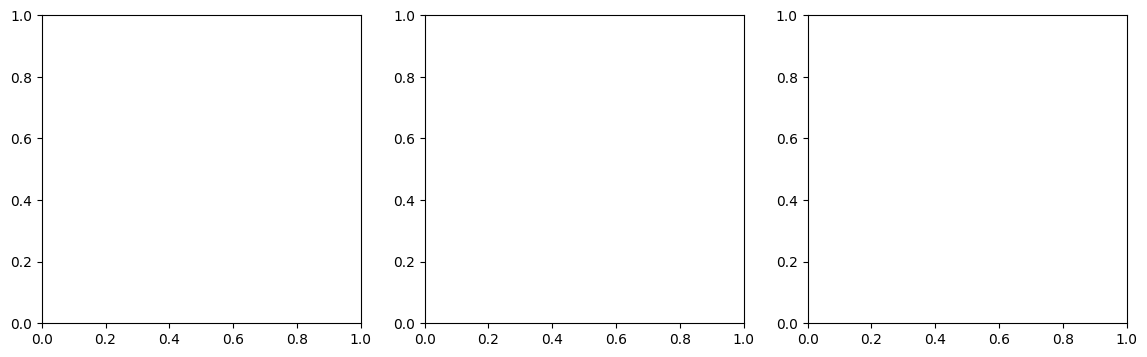

In [28]:
cat_columns = ['Pclass','Sex','Embarked']

# nrows는 1이고 ncols는 칼럼의 개수만큼인 subplots을 설정.
fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns),figsize=(14,4))

for index, column in enumerate(cat_columns):
  # seaborn의 Axes 레벨 function들은 ax 인자로 subplots의 어느 Axes에 위치할지 설정.
 sns.barplot(x=column, y='Survived', data=titanic_df, ax=axs[index])

다음으로는 연속형 칼럼들에 대해서 타깃 칼럼인  Survived값 0, 1에 따른 데이터 분포도를 확인해 보자. 두 개의 연속형 칼럼 Age(나이)와 Fare(요금)에 대해서 Survived 값이 0일 때와 1일 때 각각 데이터 분포도를 확인하되, 개별 칼럼별로 두 개의 서브플롯을 생성하여 왼쪽에는 Survived값에 따른 바이올린 플롯을 오른쪽에는 Survived값에 따른 히스토그램을 시각화해보겠다.

왼쪽에 생성되는 바이올린 플롯은 개별 Survived 이산값 0, 1별로 해당 칼럼의 바이올린 플롯을 그린다. 오른쪽에 생성되는 히스토그램은 Survived값이 0일 경우와 1일 경우 각각에 대해서 칼럼별 히스토그램으로 그린다.

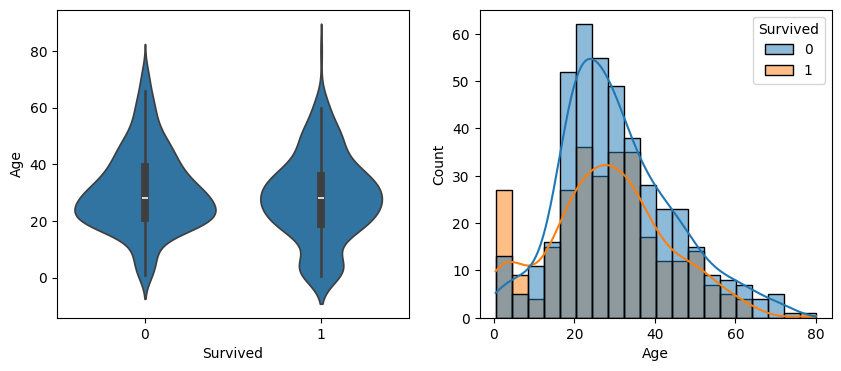

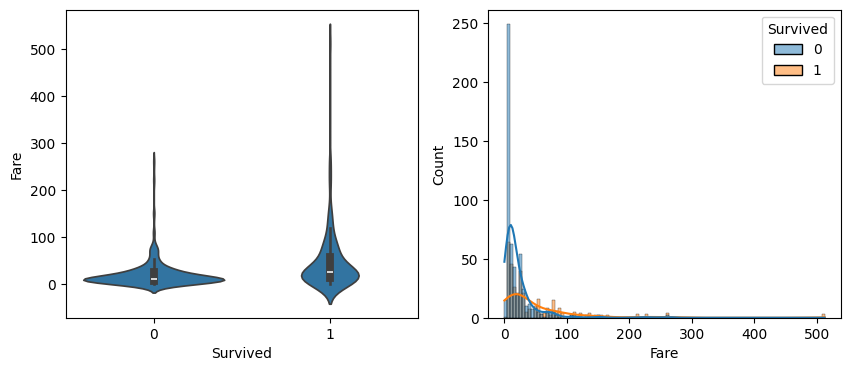

In [32]:
cont_columns = ['Age', 'Fare']

# 리스트로 할당된 칼럼들의 개수만큼 루프 수행.
for column in cont_columns:
# 왼쪽에는 바이올린 플롯, 오른쪽에는 히스토그램을 시각화. nrows는 1, ncols=2인 서브플롯 생성.
 fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
 # 왼쪽 Axes 객체에는 Survived값 0, 1 별 개별 칼럼의 바이올린 플롯 시각화.
 sns.violinplot(x='Survived',y=column, data=titanic_df, ax=axs[0])
 # 오른쪽 Axes 객체에는 Survived 값에 따른 개별 칼럼의 히스토그램 시각화
 sns.histplot(x=column, data=titanic_df, kde=True, hue='Survived', ax=axs[1])

위 코드에서는 각 개별 칼럼별로 반복해서 plt.subplots(nrows=1, ncols=2, figsize=(10,4))를 호출하여 Figure와 서브플롯 Axes를 새롭게 생성함에 유의하자. 매우 많은 칼럼들을 여러 가지 그래프를 가진 서브플롯들을 많이 사용하여 시각화할 때는 모든 칼럼들의 서브플롯을 한꺼번에 만드는 방식보다는 위와 같이 서로 다른 그래프로 시각화할 서브플롯 두 개를 개별 칼럼별로 할당하고 이들을 모든
칼럼에 순차적으로 반복하여 적용하는 방식이 좀 더 쉬운 시각화 코드를 만들 수 있다.



# 산점도, 스캐터 플롯(Scatter Plot)

산점도는 스캐터 플롯(Scatter Plot)이라고 불리며, 보통 좌표상에 점을 표시하여 변수 간의 관계를 나타낸다. 2차원 축, X축과 Y축이 있다면 X축에 해당하는 변숫값과 Y축에 해당하는 변숫값이 만나는 지점에 점을 표시하여 변수 간의 관계를 시각화한다.

일반적으로 산점도에 사용되는 X축 값, Y축 값 모두 연속형 숫자값을 적용해야 의미 있는 시작화 정보를 얻을 수 있다. 시본에서 산점도는 scatterplot 함수를 이용하여 시각화할 수 있다. scatterplot 함수를 이용하여 타이타닉 데이터 세트의 Age와 Fare 간의 관계를 산점도로 시각화해보자.

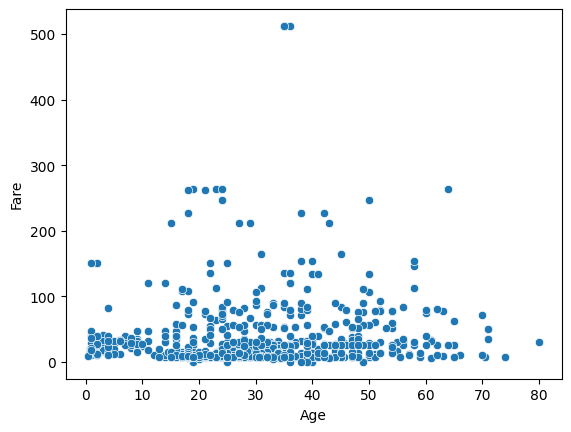

In [33]:
# X축값으로 Age를, Y축값으로 Fare를 설정
sns.scatterplot(x='Age',y='Fare',data=titanic_df)
plt.show()

산점도로 보면 주로 100이하의 낮은 요금이 전 연령대에 걸쳐서 분포되어 있는 것으로 보인다. scatterplot 함수는 시본의 다른 시각화 함수와 마찬가지로 hue 인자를 지원한다. 이번에 hue=‘Survived'를 입력하여 Age와 Fare로 표현되는 점을 사망/생존으로 추가적인 분리를 적용해 보겠다.

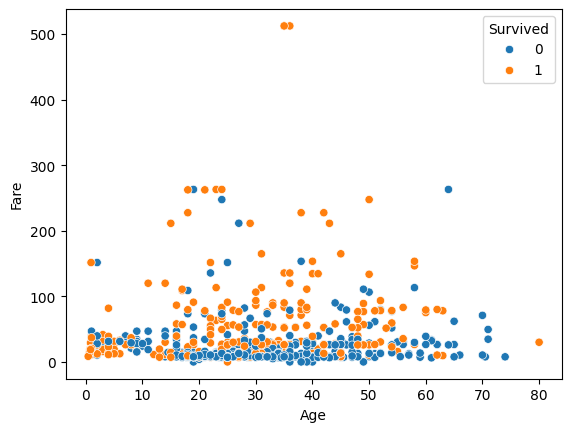

In [34]:
sns.scatterplot(x='Age',y='Fare',hue='Survived',data=titanic_df)
plt.show()

scatterplot() 함수는 hue 외에도 한 단계 더 세분화된 추가 정보를 제공할 수 있는데 바로 style 인자다. 이번엔 hue=‘Survived’와 함께 style=‘Sex’를 입력하여 시각해 보겠다.

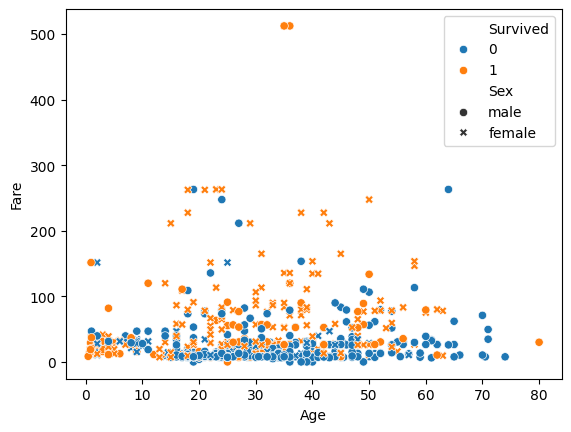

In [35]:
sns.scatterplot(x='Age',y='Fare',hue='Survived',style='Sex',data=titanic_df)
plt.show()

# 상관 히트맵(Correlation Heatmap)
상관 히트매은 다수의 속성들 간의 상관계수를 히트맵 형태로 나다낼 수 있다. 히트맵(Heatmap)은 이름 그대로 열을 의미하는 히트(Heat)와 지도를 의미하는 맵(map)이 결합된 단어이다. 수치값을 온도를 연상시키는 다양한 색상으로 표현하는 것을 특징으로 한다. 상관계수는 두 속성(변수/칼럼/피처)들 간의 선형적인 연관 관계를 수치화한 값이다. 두 속성의 값이 서로 상관없으면 0이며, 같은 방향으로 완전히 동일하면 1, 반대 방향으로 완전히 동일하면 -1을 값으로 가진다. 두 속성이 깉은 방향으로 상관도가 높을 경우 상관계수는 1에 가깝게 되며, 다른 방향으로 상관도가 높을 경우에는 - 1에 가깝게 된다.

상관 히트맵은 시본에서 heatmap() 함수를 통해서 시각화될 수 있다. heatmap() 함수는 인자로 칼럼들 간의 상관계수를 가지는 DataFrame을 입력받아야 시각화가 가능하다. 판다스 DataFrame의 corr() 메서드를 호출하면 간단하게 상관계수를 가지는 DataFrame을 생성할 수 있다. 타이타닉 DataFrame에서 corr() 메서드를 호출하여 칼럼들 간의 상관계수를 가지는 DataFrame을 생성해 보자.

In [45]:
corr_df = titanic_df.corr()
corr_df

ValueError: could not convert string to float: 'male'

이제 이 상관계수 DataFrame을 히트맵으로 표현해 보겠다. 앞에서 말씀드린 시본의 heatmap() 함수의 인자로 방금 구한 상관계수 DataFrame을 인자로 입력하면 된다.

In [46]:
# 상관계수를 DataFrame으로 구하고 이를 heatmap()의 인자로 입력
corr=titanic_df.corr()
sns.heatmap(corr)
plt.show()

ValueError: could not convert string to float: 'male'

heatmap() 함수는 여러 인자들로 보다 다양한 시각화를 할 수 있다. 먼저 cmap 인자는 color map으로서 히트맵의 색상을 변경할 수 있게 해준다. cmap 인자값을 설정하지 않으면 기본으로‘rocket으로 설정된다.‘rocket'의 cmap은 아래와 같습니다（마치 로켓이 뿜어내는 화염이 연상된다).

 annot 인자는 True/False로 설정할 수 있으며 True일 경우 숫자로 된 상관계숫값을 표시해 준다.
annot 인자는 생략될 경우는 False이다. annot 인자로 숫자 상관계숫값을 표시할 경우에는 정밀도가‘너무 높으면 개별 숫자값이 길이가 커져서 서로 겹쳐 보이게 된다. 이 경우 fmt 인자로 숫자값의 포맷을 변환할 수 있다. fmt=‘.lf'로 설정하면 소수점 한 자리까지만 상관계숫값을 표시한다.
cbar 인자는 True/False로 설정할 수 있으며 True일 경우 숫자값에 따른 색깔 기준 막대로 표시한다. False는 색깔 기준 막대를 표시하지 않으며, cbar 인자를 생략할 경우 True로 설정된다. 위에서 설명한 인자들을 heatmap() 함수에 입력하여 다시 시각화해보겠다.

In [42]:
sns.heatmap(corr, annot=True, fmt='.1f',cbar=True)
plt.show()

NameError: name 'corr' is not defined

상관계수 숫자값을 표시하면서 칼럼 간의 상관계수를 좀 더 명확하게 확인할 수 있다. 결정값인
Survived는 Pclass와 -0.3, Fare와는 0.3의 상관계수를 가짐을 알 수 있습니다. 또한 Pclass는 Age
의 -0.4, Fare와 -0.5의 상관계수를 가진다. 또한 SibSp와 Parch는 0.4로 서로 밀접한 관계가 있음
을 알 수 있다.

상관 히트맵은 칼럼 간의 상관관계를 이해할 수 있게 해주는 유용한 시각화 기능이다. 특히 칼럼들이 매우 많을 경우에 활용도가 매우 높으며, 상관 히트맵을 통해서 어떤 피처들이 타깃값과 밀접한 상관관계를 가지는지를 파악하여 해당 피처에 대한 피처 엔지니어링을 집중적으로 수행한다든지, 피처들끼리 상관도가 매우 높다면 상호 간의 높은 종속관계를 의심하여 특정 피처들을 제거하는 용도로 사용될 수 있다.

# 04. 정리
이번 장에서는 맷플롯립과 시본을 이용하여 여러 유형의 차트들을 시각화해보았다. 맷플롯립의 경우 pyplot 모듈의 두 가지 중요 요소인 Figure와 Axes의 차이와 이 두 객체의 핵심적인 역할에 대해서 알아봤다. Figure는 그림을 그리기 위해 그림판의 크기를 조절하는 역할은 수행하지만 실질적으로 그림을 그리는 역할은 Axes에서 수행한다. 뿐만 아니라X축, Y축, 타이틀, 범례 등의 속성을 설정하는 데도 이용되므로 이 Axes 객체의 활용법을 이해하는 것은 맷플롯립과 시본을 활용하는 데 중요하다.

pyplot 모듈의 plt.subplots() 함수를 이용하면 여러 개의 서브플롯들을 생성할 수 있고, 이들을 이용하면 여러 개의 그래프들을 한 번에 시각화할 수 있다. 이때 할당되는 Axes 객체를 튜플이나 배열 인덱스로 접근할 수 있었으며, 시각화는 개별 서브플롯별로 할당된 Axes 객체의 시각화 함수들을 호출하여 수행할 수 있다.

시본은 맷플롯립보다 쉽게 다양한 시각화 차트를 만들 수 있다. 특히 판다스 DataFrame과 유연하게 통합되어 별도의 추가 코딩 없이도 축명이나 범례 등을 자동으로 설정할 수 있다.